# K-means Clustering

### Import resources and display image

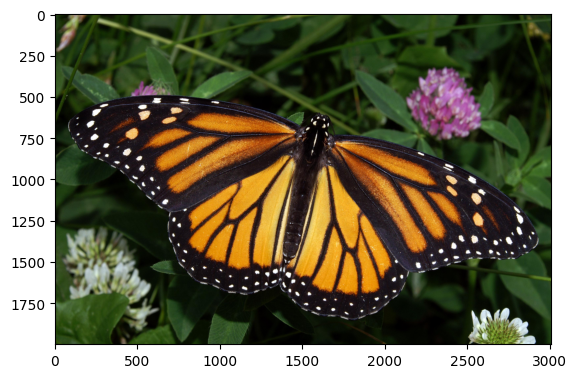

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/monarch.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Prepare data for k-means

In [10]:
# Reshape image into a 2D array of pixels and color values (RGB)
pixel_vals = image_copy.reshape((-1,3)) # Mx3, where M is the number of pixels and 3 is the number of color channels

# Convert to float type
pixel_vals = np.float32(pixel_vals) # necessary step to prepare for k-means clustering

### Implement k-means clustering

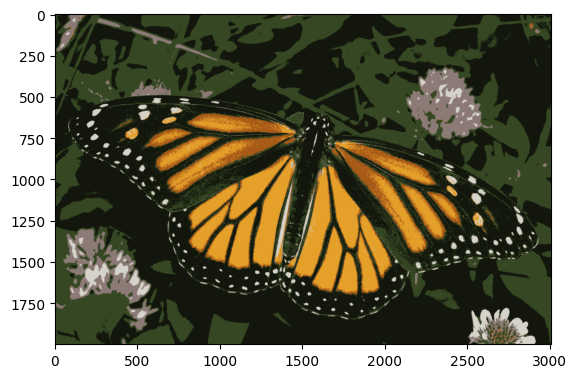

In [30]:
# Define stopping criteria
# this tells function when to stop
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# 1st argument tells what is the criteria, in this case it is either some threshold epsilon or maximum number of iterations
# max number of iterations are 10
# threshold is 1.0

# Perform k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# 1st argument is the Mx3 pixel values that are just created
# 2nd is the k value or the number of center points
# 3rd in any labels we want for these center points, None in this case
# 4th is the stop criteria that needs to be defined
# 5th is the number of attempts 
# 6th is the selection of the center points which is random in this nature


# labels are k means points with either or one label from k = 2
# centers are the center points for these labels



# Convert data into 8-bit values (i.e. an 8 bit image)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_data = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape((image_copy.shape[0], image_copy.shape[1]))

plt.imshow(segmented_data)

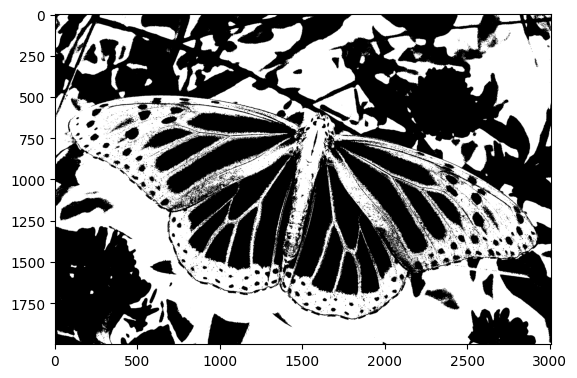

In [31]:
# Visualize one segment

plt.imshow(labels_reshape ==1, cmap = 'gray')

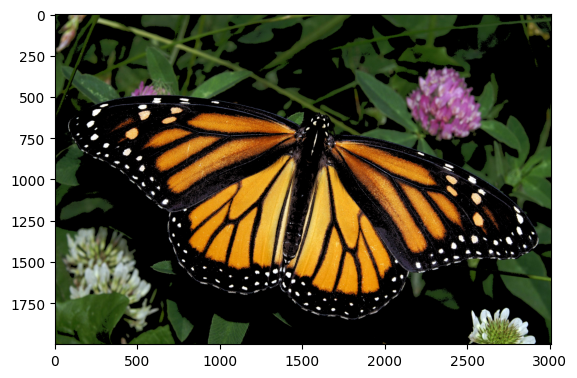

In [32]:
# Mask image segment

masked_image = np.copy(image_copy)

masked_image[labels_reshape ==1] = [0,0,0]

plt.imshow(masked_image)